# Example showing PCA for Iris Dataset
## Load Iris Dataset


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from sklearn.datasets import load_iris 
from sklearn import datasets, linear_model, metrics  
  

iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [84]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Removing the unneeded column


In [85]:
iris=iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe
print(iris)

None


## Binning 

Bin Mean: 
 [[2.18 2.18 2.18 2.18 2.18]
 [2.34 2.34 2.34 2.34 2.34]
 [2.48 2.48 2.48 2.48 2.48]
 [2.52 2.52 2.52 2.52 2.52]
 [2.62 2.62 2.62 2.62 2.62]
 [2.7  2.7  2.7  2.7  2.7 ]
 [2.74 2.74 2.74 2.74 2.74]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.8  2.8  2.8  2.8  2.8 ]
 [2.86 2.86 2.86 2.86 2.86]
 [2.9  2.9  2.9  2.9  2.9 ]
 [2.96 2.96 2.96 2.96 2.96]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.   3.   3.   3.   3.  ]
 [3.04 3.04 3.04 3.04 3.04]
 [3.1  3.1  3.1  3.1  3.1 ]
 [3.12 3.12 3.12 3.12 3.12]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.2  3.2  3.2  3.2  3.2 ]
 [3.26 3.26 3.26 3.26 3.26]
 [3.34 3.34 3.34 3.34 3.34]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.4  3.4  3.4  3.4  3.4 ]
 [3.5  3.5  3.5  3.5  3.5 ]
 [3.58 3.58 3.58 3.58 3.58]
 [3.74 3.74 3.74 3.74 3.74]
 [3.82 3.82 3.82 3.82 3.82]
 [4.12 4.12 4.12 4.12 4.12]]
Bin Boundaries: 
 [[2.  2.3 2.3 2.3 2.3]
 [2.3 2.3 2.3 2.4 2.4]
 [2.4 2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5 2.6]
 [2.6 2.6 2.6 2.6 2.7]
 [2.7 2.7 2.7 

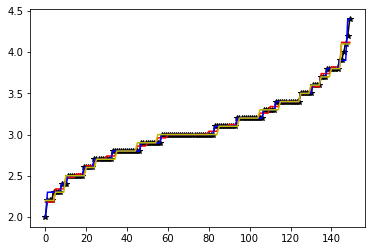

In [75]:

# load iris data set 
dataset = load_iris()    
a = dataset.data 
b = np.zeros(150) 
  
# take 1st column among 4 column of data set  
for i in range (150): 
    b[i]=a[i,1]    
  
b=np.sort(b)  #sort the array 
  
# create bins 
bin1=np.zeros((30,5))  
bin2=np.zeros((30,5)) 
bin3=np.zeros((30,5)) 
  
# Bin mean 
for i in range (0,150,5): 
    k=int(i/5) 
    mean=(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4])/5
    for j in range(5): 
        bin1[k,j]=mean 
print("Bin Mean: \n",bin1) 
     
# Bin boundaries 
for i in range (0,150,5): 
    k=int(i/5) 
    for j in range (5): 
        if (b[i+j]-b[i]) < (b[i+4]-b[i+j]): 
            bin2[k,j]=b[i] 
        else: 
            bin2[k,j]=b[i+4]        
print("Bin Boundaries: \n",bin2) 
  
# Bin median 
for i in range (0,150,5): 
    k=int(i/5) 
    for j in range (5): 
        bin3[k,j]=b[i+2] 
print("Bin Median: \n",bin3) 

print((b))

print(len(bin1))

plt.plot(b,'k*-')
plt.plot(bin1.flatten(),'r-')
plt.plot(bin2.flatten(),'b-')
plt.plot(bin3.flatten(),'y-')


## Some Exploratory Data Analysis With Iris


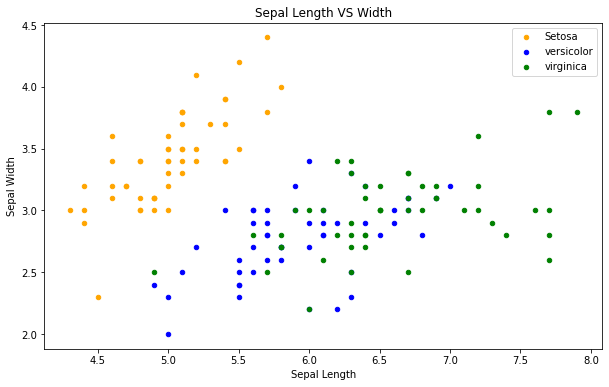

In [68]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.



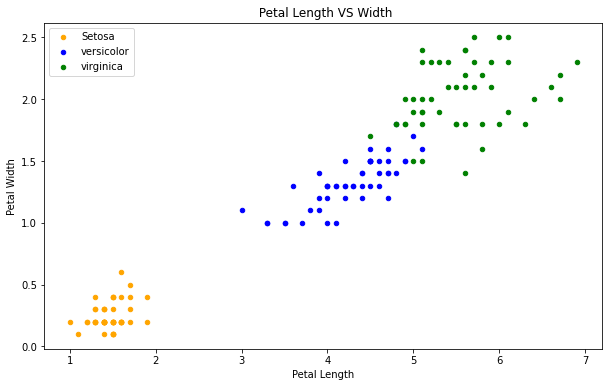

In [69]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Now let us see how are the length and width are distributed


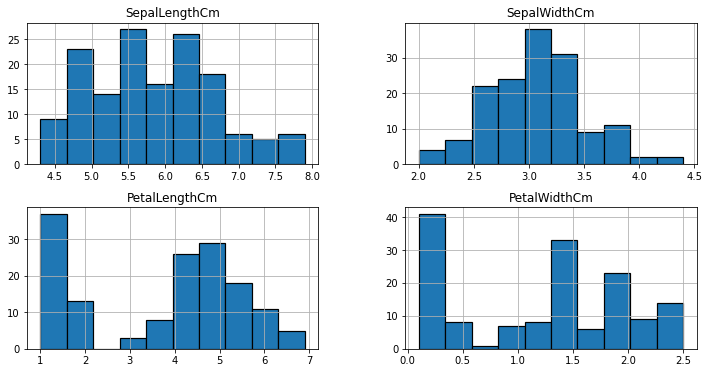

In [70]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Now let us see how the length and width vary according to the species


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

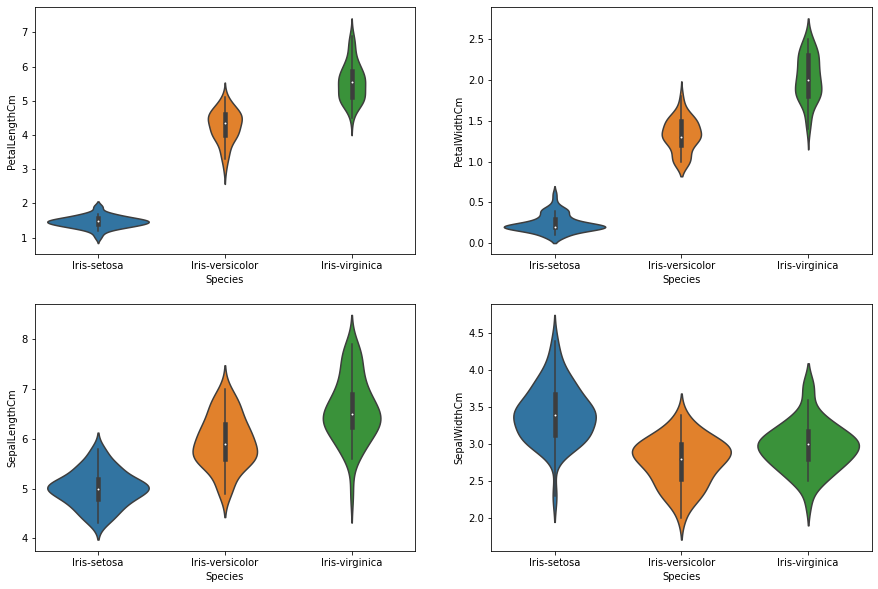

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

## Standardize the Data

In [58]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Separating out the features
x = iris.loc[:, features].values
# Separating out the target
y = iris.loc[:,['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Projection to 2D

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)

PCA(n_components=2)
     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]


In [54]:
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)

## Visualize 2D Projection

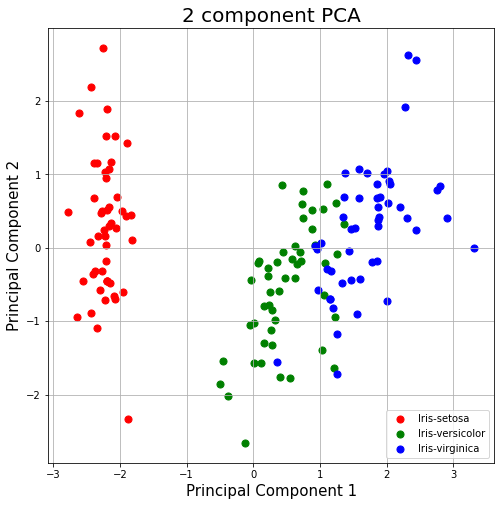

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## Explained Variance
### This tells us how much information (variance) can be attributed to each of the principal components

In [56]:
pca.explained_variance_ratio_


array([0.72770452, 0.23030523])